### Optimizer (수치 최적화 알고리즘)

- 딥 러닝의 학습 과정 중, 손실함수의 거리를 좁혀가는 함수.
    - 이 과정에서 미분을 이용한 수치 최적화 알고리즘을 사용한다. 여기서 **수치 최적화 알고리즘**을 **Optimizer**라고 한다.
- 반복적으로 정해진 방법을 업데이트 하는 방식을 사용하여 문제를 푼다.
- 초기값 설정, 방향 설정, 학습 율 만큼 업데이트 한다.

- 수치 최적화 알고리즘 종류
    | 알고리즘 | 연도 | 학습률 | 탐색방향 | 알고리즘 기반 |
    | --- | --- | --- | --- | --- |
    | SGD | 1945 | 상수 | 그래디언트 | 탐색방향 |
    | Momentom/Nesterov | 1964/1983 | 상수 | 단기 누적 그래디언트 | 탐색방향 |
    | Adagrad | 2011 | 장기 파라미터 변화량과 반비례 | 그래디언트 | 학습률 |
    | RMSProp | 2012 | 단기 파라미터 변화량과 반비례 | 그래디언트 | 학습률 |
    | Adam | 2014 | 단기 파라미터 변화량과 반비례 | 단기 누적 그래디언트 | 학습률 |

### 기본 이론 : 경사 하강법(Gradient Descent)
- Gradient Descent
    - 가중치 $w$ 업데이트 :
      - $ w^{(k+1)} = w^{(k)} - \epsilon \nabla f(w^{(k)}) $ 
      - $ w^{(k+1)} = w^{(k)} - \alpha \nabla f(w^{(k)}) $
      - $ w^{(k+2)} = w^{(k+1)} - \alpha \nabla f(w^{(k+1)}) $
      - 가중치가 국소 최소점 수렴할 때까지 반복
    - 최종 가중치 업데이트 식 : 
        - $ w^{(k+1)} = w^{(k)} - \epsilon \nabla f(w^{(k)}) $
        >학습률 : $ \alpha $ <br>
        >그래디언트 노이즈 : $ \epsilon $ <br>

- Stochastic Gradient Descent (SGD) 설명:
    - 입력층은 뉴런 수 : $ N $
    - 출력층은 뉴런 수 : $ M $
    - 손실 함수의 그래디언트를 기반 업데이트:
        - $ W = \begin{bmatrix} W_{1,1} & \dots & W_{1,N} \\
        \vdots & \ddots & \vdots \\
        W_{M,1} & \dots & W_{M,N} \end{bmatrix} $
    - 출력 $ y $ :
        - $ y = g(u) = \begin{bmatrix} g(u_1) \\ g(u_2) \\ \vdots \\ g(u_M) \end{bmatrix} = g\left( \begin{bmatrix} \sum_{n=1}^{N} W_{1,n} x_n \\ \sum_{n=1}^{N} W_{2,n} x_n \\ \vdots \\ \sum_{n=1}^{N} W_{M,n} x_n \end{bmatrix} \right) $

- 손실 함수와 그래디언트 :
    - 분류 문제에서 손실 함수 (with log-likelyhood) :
        - $\text{loss}(f(w)) = - \sum_{i=1}^{N} \sum_{j=1}^{M} a_{ij} \log q_j(x_i, w)$
    - 손실의 그래디언트 :
        - $\frac{\partial f}{\partial W} = \begin{bmatrix} \frac{\partial f}{\partial W_{1,1}} & \dots & \frac{\partial f}{\partial W_{1,N}} \\ \vdots & \ddots & \vdots \\ \frac{\partial f}{\partial W_{M,1}} & \dots & \frac{\partial f}{\partial W_{M,N}} \end{bmatrix}$


### 탐색 방향 기반 알고리즘

- Stocastic Gredient Descent (SGD) - 확률적 미니배치 경사 하강 법, 계산 량이 너무 많다. 그래서 Mini batch를 이용하여 랜덤 추출하여 그래디언트 계산을 한다.
    - 과정 :
        - 초기값 $w^{(0)}$ 설정
        - 데이터 섞기
        - mini batch 만큼 추출 후 계산 반복
            - $\nabla f(w^{(k)}) = \frac{\partial}{\partial w} f(w,b)$ : 가중치와 바이어스 값 에대한 Loss의 편 미분
            - 탐색 방향 = $-\mu \nabla f(w^{w(k)})$ : 탐색방향으로 학습률 $\mu$ 만큼 한걸음 내딛는다.
            - 파라미터 업데이트 $w^{(k+1)} \leftarrow w^{(k)} - \mu \nabla f(w^{(k)})$
- Momentum : Gredient 의 국소 최소 값을 벗어 나기위한 방법 ( 전 단계의 탐색 방향 누적 합에 현재 GD를 더해 벗어 나게 해준다. ) 즉 속도의 개념을 추가하여 도랑을 지나 넘어가게 해준다.
    - 과정 :
        - 초기값 $w^{(0)}$ 설정
        - 초기 누적 속도 $v^{(0)} = 0$ 설정
        - 데이터 섞기
        - mini batch 만큼 추출 후 계산 반복
            - 누적 속도 업데이트 $v^{(k+1)} \leftarrow \alpha v^{(k)} - \mu \nabla f(w^{(k)})$
            - 파라미터 업데이트 $w^{(k+1)} \leftarrow w^{(k)} +v^{(k+1)}$
- Nesterov : Momentom 보다 수렴 속도가 빠르다(그래디언트 부분의 차이만 있다)
    - 과정 :
        - 초기값 $w^{(0)}$ 설정
        - 초기 누적 속도 $v^{(0)} = 0$ 설정
        - 데이터 섞기
        - mini batch 만큼 추출 후 계산 반복
            - 속도에 대한 미분(가속도 개념) 계산 :  $\nabla f(w^{(k)} + \alpha v^{(k)})$
            - 누적 속도 업데이트 $v^{(k+1)} \leftarrow \alpha v^{(k)} - \mu$ **$\nabla f(w^{(k)} + \alpha v^{(k)})$**
            - 파라미터 업데이트 $w^{(k+1)} \leftarrow w^{(k)} +v^{(k+1)}$

### 학습률 기반 알고리즘

- 학습률을 고정하지 않고 적절한 학습률 계산 ( 학습률 고정 시 발산, 속도 느림 문제가 있음 : SGD, Momentom, Nesterov)
    - 처음엔 큰 학습률로 시작하여 손실 함수 값이 작아지면 학습률 크기를 절반으로 하여 업데이트 하는 방식이다.
- Adagrad : 최솟값을 잘 찾아간다. 초기부터 미분의 제곱의 누적의 합을 가지고 있어 속도가 느림
    - 과정:
        - 초기값 $w^{(0)}$ 설정
        - 장기 누적 미분 $r^{(0)} = 0$ 설정
        - 데이터 섞기
        - mini batch 만큼 추출 후 계산 반복
            - 미분 계산 $\nabla f ( w^{(k)} )$
            - 장기 누적 미분 계산 : $r^{(k+1)} \leftarrow  r^{(k)}  + \nabla f ( w^{(k)} ) \odot \nabla f ( w^{(k)} )$
                
                여기서 $\odot$ 은 각 요소의 곱, 즉 여기서는 각 요소가 같으므로 제곱이다.
                
            - 파라미터 업데이트 : $w^{(k+1)} \leftarrow w^{(k)} - \frac{\mu}{\delta + \sqrt{r^{(k+1)}}} \odot \nabla f ( w^{(k)} )$
                
                여기서 $\delta$ 분모가 0이 되기를 방지하는 아주 작은 상수이다.  
                
- RMSProop (Root Mean Square Propagation) : 오래된 미분은 반영이 적어진다. $\rho$ 와 $1- \rho$  로 인해 초기 가중치의 영향이 줄어든다.
    - 과정 :
        - 초기값 $w^{(0)}$ 설정
        - 장기 누적 미분 $r^{(0)} = 0$ 설정
        - 데이터 섞기
        - mini batch 만큼 추출 후 계산 반복 **(빨간 글씨는 adagrad 와의 다른점)**
            - 미분 계산 $\nabla f ( w^{(k)} )$
            - 장기 누적 미분 계산 : $r^{(k+1)} \leftarrow$ $\rho$  $r^{(k)}  + ($ $1 - \rho$ $) \nabla f ( w^{(k)} ) \odot \nabla f ( w^{(k)} )$
            - 파라미터 업데이트 : $w^{(k+1)} \leftarrow w^{(k)} - \frac{\mu}{\delta + \sqrt{r^{(k+1)}}} \odot \nabla f ( w^{(k)} )$
- **Adam(Adaptive Moment)** : 탐색 방향 + 학습률 갱신
    - 과정 :
        - 초기값 $w^{(0)}$ 설정
        - 단기 누적 미분의 크기 $r^{(0)} = 0$ 설정
        - 단기 누적 미분의 합 $s^{(0)} = 0$ 설정
        - 데이터 섞기
        - mini batch 만큼 추출 후 계산 반복
            - 미분 계산 $\nabla f ( w^{(k)} )$
            - 탐색 방향 (평균 : 단기 누적 미분의 합 계산):
                - $s^{(k+1)} \leftarrow \rho_1 s^{(k)}  + (1 - \rho_1) \nabla f ( w^{(k)} )$
                - $\hat{s}^{(k+1)} \leftarrow \frac{s^{(k+1)}}{1-\rho_1^{(k+1)}}$
            - 학습률 (분산 : 단기 누적 미분의 크기 ) :
                - $r^{(k+1)} \leftarrow \rho_2 r^{(k)} + (1-\rho_2) \nabla f(w^{(k)}) \odot \nabla f(w^{(k)})$
                - $\hat{r}^{(k+1)} \leftarrow \frac{r^{(k+1)}}{1-\rho_2^{(k+1)}}$
            - 파라미터 업데이트 : $w^{(k+1)} \leftarrow w^{(k)} - \frac{\mu}{\delta + \sqrt{\hat{r}^{(k+1)}}} \hat{s}^{(k+1)}$
- Adabelif : adaptive methods 의 빠른 수렴 성, SGD 와 같은 일반화, 훈련 안정성 - 관측된 기울기가 예측과 가까우면 큰 걸음을, 관측된 기울기가 예측과 다르면 작은 걸음을 내딛는다. (기울기를 믿고 도약)
    - 이미지 분류 및 언어 모델에서 빠른 수렴과 높은 정확도.
    - ImageNet 에서 SGD 와 비슷한 정확도
    - Cifar10데이터 셋의 GAN 훈련에 대한 높은 안정성
    - Adam 과의 차이점
        - 미분 계산 $\nabla f ( w^{(k)} )$
        - 탐색 방향 : 단기 누적 미분의 합 계산 :
            - $s^{(k+1)} \leftarrow \rho_1 s^{(k)}  + (1 - \rho_1) \nabla f ( w^{(k)} )$
            - $\hat{s}^{(k+1)} \leftarrow \frac{s^{(k+1)}}{1-\rho_1^{(k+1)}}$
        - 학습 률 ( 단기 누적 미분의 크기 ) : **파란부분은 Adam 과의 차이점**
            - $r'^{(k+1)} \leftarrow \rho_2 r'^{(k)} + (1-\rho_2)$ $(\nabla f(w^{(k)}) - s^{(k+1)}) \odot (\nabla f(w^{(k)}) - s^{(k+1)}) + \delta$
            
            라고 할 때
            
            - $r'^{(k+1)} \leftarrow \rho_2 r'^{(k)} + (1-\rho_2)$$(\nabla f(w^{(k)}) - s^{(k+1)}) ^2 + \delta$
        - $\hat{r'}^{(k+1)} \leftarrow \frac{r'^{(k+1)}}{1-\rho_2^{(k+1)}}$
        - 파라미터 업데이트 : $w^{(k+1)} \leftarrow w^{(k)} - \frac{\mu}{\delta + \sqrt{\hat{r'}^{(k+1)}}} \hat{s}^{(k+1)}$

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import plotly.graph_objs as go # 3 차원 그릴떄 쓴다.

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# 시스템 폰트패밀리에 따라 변경
plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False

In [13]:
def gradient_descent(f, grad_f, x_0, learning_rate, max_iter):
    paths = []
    for i in range(max_iter):
        x_1 = x_0 - learning_rate * grad_f(x_0)
        paths.append(x_1)
        x_0 = x_1
    return np.array(paths)

In [14]:
x = np.linspace(-1, 7, 100)
f = lambda x: x*np.sin(x)
grad_f = lambda x: np.sin(x) + x * np.cos(x)
## 초깃값의 민감성
paths_s = gradient_descent(f, grad_f, 2.5, learning_rate=0.25, max_iter=5)
paths_o = gradient_descent(f, grad_f, 1.5, learning_rate=0.25, max_iter=5)


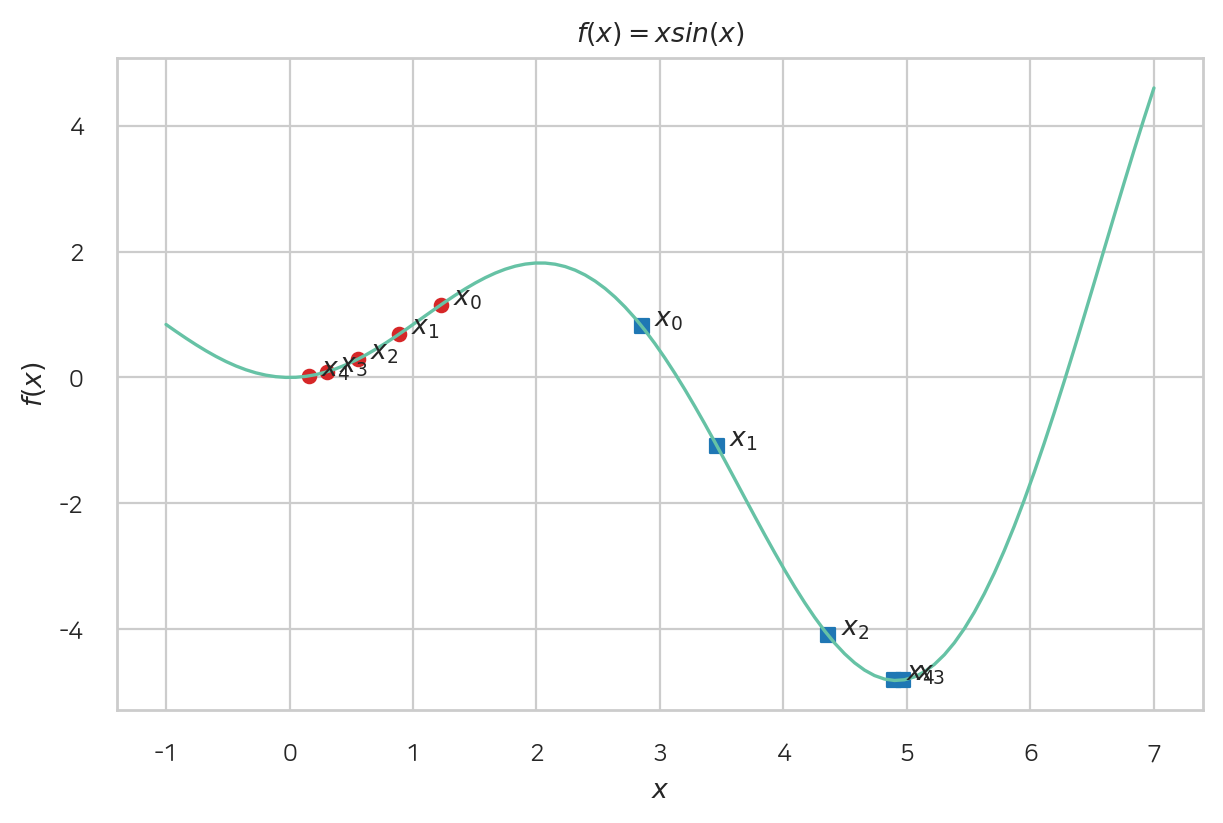

In [15]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, f(x))
ax.scatter(paths_s, f(paths_s), marker = "s", color = "tab:blue")
ax.scatter(paths_o, f(paths_o), marker = "o", color = "tab:red")
for k, point in enumerate(paths_s):
    ax.text(point+0.1, f(point), f'$x_{k}$')
for k, point in enumerate(paths_o):
    ax.text(point+0.1, f(point), f'$x_{k}$')
    ax.set(xlabel = R'$x$', ylabel = R'$f(x)$', title = "$f(x) = xsin(x)$");

In [16]:
x = np.outer(np.linspace(-5, 5, 5), np.ones((10,))) # 메쉬 만들기
y = x.copy().T

In [17]:
x = np.outer(np.linspace(-4, 5, 30), np.ones(30))
y = x.copy().T # transpose
z = 5*(x*np.cos(x)) + (2*y-1)**2
surface = go.Surface(x = x, y = y, z = z)
data = [surface]
layout = go.Layout(title = '3D Surface Plot')
fig = go.Figure(data = data, layout=layout)
fig.show()

### 다양한 옵티마이저 예제(torch)

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

# 신경망 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(10, 5)  # 입력층에서 은닉층
        self.relu = nn.ReLU()           # 활성화 함수
        self.layer2 = nn.Linear(5, 1)   # 은닉층에서 출력층
        self.sigmoid = nn.Sigmoid()     # 이진 분류를 위한 활성화 함수

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x


In [19]:
# 훈련 데이터 준비

# 임의의 데이터 생성
inputs = torch.randn(100, 10)  # 100개의 샘플, 각각 10개의 특성
targets = torch.rand(100, 1).round()  # 이진 타겟


In [20]:
def select_opti_with_fit(model ,opti):
    # 모델 초기화
    model = model
    criterion = nn.BCELoss()
    optimizer = opti
    
    # 데이터 생성
    inputs = torch.randn(1000, 10)
    targets = torch.rand(1000, 1).round()

    # 훈련 루프
    num_epochs = 10000
    losses = []

    for epoch in range(num_epochs):
        optimizer.zero_grad()   # 그래디언트를 0으로 초기화
        outputs = model(inputs)  # 모델에 입력을 주어 출력을 얻음
        loss = criterion(outputs, targets)  # 손실 계산
        loss.backward()  # 손실에 대한 그래디언트 계산
        optimizer.step()  # 가중치 업데이트
        
        losses.append(loss.item())
        # if (epoch+1) % 10 == 0:
        #     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    return losses

In [21]:
model = SimpleNN()

op_sgd = optim.SGD(params=model.parameters(), lr=0.01)  # SGD 옵티마이저
op_adm = optim.Adam(params=model.parameters())  # Adam 옵티마이저
op_rms = optim.RMSprop(params=model.parameters())  # RMSprop 옵티마이저
op_grd = optim.Adagrad(params=model.parameters())  # Adagrad 옵티마이저

losses_sgd = select_opti_with_fit(model ,op_sgd)
losses_adam = select_opti_with_fit(model,op_adm)
losses_rmsprop = select_opti_with_fit(model,op_rms)
losses_adagrad = select_opti_with_fit(model, op_grd)

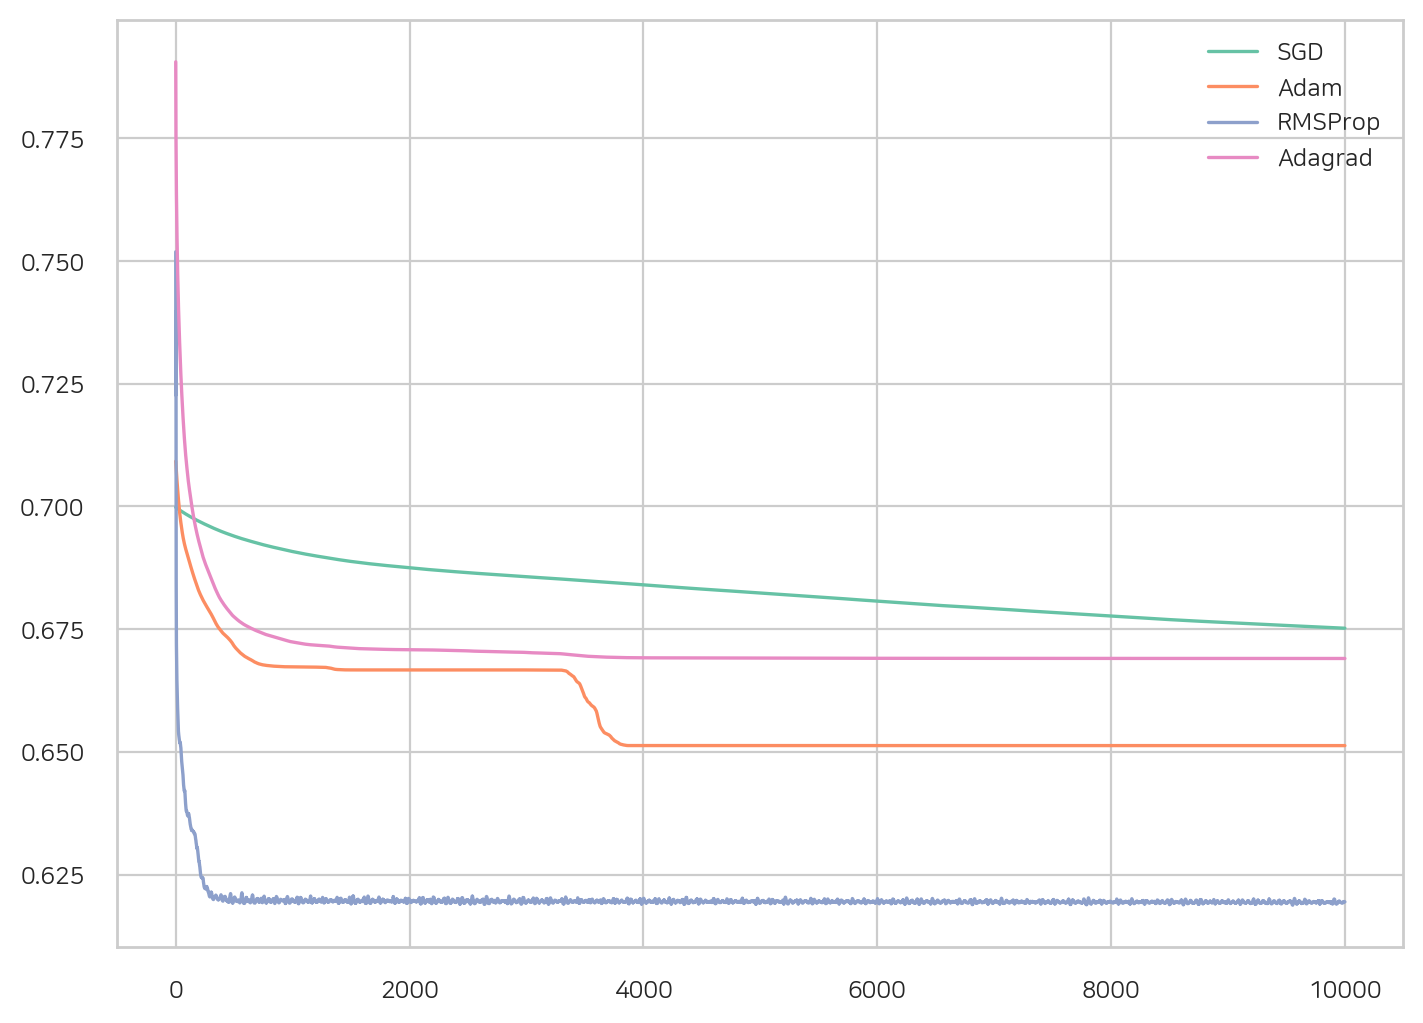

In [22]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.lineplot(losses_sgd,label = "SGD" , ax=ax)
sns.lineplot(losses_adam,label = "Adam" , ax=ax)
sns.lineplot(losses_rmsprop,label = "RMSProp" , ax=ax)
sns.lineplot(losses_adagrad,label = "Adagrad" , ax=ax)
ax.legend()